In [2]:
import numpy as np
import pandas as pd


## Imdb top 250 csv uzantılı dosyamızı projemize entegre edelim.

In [3]:
movie = pd.read_csv('imdbTop250.csv')
df = movie.copy()
df2 = movie.copy()
df.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars: Episode IV - A New Hope,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1299781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2529673,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,665213,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Drama, Mystery",8.5,77.0,1045626,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,53316,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN


### Veri setimiz üzerinde betimsel istatistik değerlerini ve veri seti bilgilerini gözlemleyelim.

In [4]:
print(f" Veri setinin boyut sayısı: {df.ndim}\n",
     f"Veri setinin boyut bilgisi: {df.shape}\n",
     f"Veri setindeki toplam eleman sayısı: {df.size}\n")

 Veri setinin boyut sayısı: 2
 Veri setinin boyut bilgisi: (6500, 16)
 Veri setindeki toplam eleman sayısı: 104000



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ranking   6500 non-null   int64  
 1   IMDByear  6500 non-null   int64  
 2   IMDBlink  6500 non-null   object 
 3   Title     6500 non-null   object 
 4   Date      6500 non-null   int64  
 5   RunTime   6500 non-null   int64  
 6   Genre     6500 non-null   object 
 7   Rating    6500 non-null   float64
 8   Score     5674 non-null   float64
 9   Votes     6500 non-null   int64  
 10  Gross     5691 non-null   float64
 11  Director  6500 non-null   object 
 12  Cast1     6500 non-null   object 
 13  Cast2     6500 non-null   object 
 14  Cast3     6492 non-null   object 
 15  Cast4     6492 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 812.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ranking,6500.0,125.500000,72.173758,1.00,63.00,125.50,188.000,250.00
IMDByear,6500.0,2008.500000,7.500577,1996.00,2002.00,2008.50,2015.000,2021.00
Date,6500.0,1978.649385,23.625371,1920.00,1959.00,1984.00,1998.000,2021.00
RunTime,6500.0,125.603385,31.138483,16.00,104.00,121.00,138.000,321.00
Rating,6500.0,8.171431,0.327116,5.50,8.00,8.10,8.300,9.30
Score,5674.0,84.247268,10.053112,61.00,77.00,85.00,92.000,100.00
Votes,6500.0,484350.124000,474385.635068,9194.00,121463.00,305777.00,734121.000,2529673.00
Gross,5691.0,70.709617,103.075729,0.01,5.32,26.24,92.435,936.66


### Gözlemlediğimiz kadarıyla eksik değerler söz konusu. Örneğin 'float' sayısal veri tipine sahip 'Gross' ve 'Score' değişkenlerimiz de eksik değerler mevcut. Kategorik değişkenlerimizde de eksik değerler var fakat bunu şimdilik önemsemeyeceğiz çünkü 'regresyon' modelleri üzerinden ilerleyeceğiz..

In [7]:
df.isnull().sum()

Ranking       0
IMDByear      0
IMDBlink      0
Title         0
Date          0
RunTime       0
Genre         0
Rating        0
Score       826
Votes         0
Gross       809
Director      0
Cast1         0
Cast2         0
Cast3         8
Cast4         8
dtype: int64

In [8]:
df['Score'].head()

0    90.0
1    80.0
2    83.0
3    77.0
4     NaN
Name: Score, dtype: float64

In [9]:
df['Gross'].head()

0    322.74
1     28.34
2     16.50
3     23.34
4       NaN
Name: Gross, dtype: float64

### 'Score' değişkenimiz filmlerin 100 üzerinden aldığı puanı gösteriyor, 'gross' değişkenimiz ise filmlerin brüt kazandığı para miktarını içeriyor. Şimdi bu bilgilere göre 'NaN' değerleri nasıl doldurmalıyız yada atmalıyız üzerine düşünebiliriz. Baktığımız zaman 6500 veriden score değişkeninde 826, gross değişkeninde 809 adet veri eksik. Dolayısıyla baya bir eksik değer söz konusu olduğu için bunları 'drop' ile silmek, doldurmaya nazaran daha tehlikeli.

### Şimdi dolduracağız fakat bu değerleri direkt 0'a atayarak mı yapmalıyız yoksa ortalama veya medyan vs. gibi değerler ile mi doldurmalıyız bu soru çıkıyor karşımıza.. Tekrardan çok fazla değerin eksik olduğunu gözlemlediğimiz için ortalamaya atamanın daha doğru olacağını düşünüyorum..

In [10]:
from pandas.api import types
def fix_mising(df, col, name):
    if types.is_numeric_dtype(col):
        if pd.isnull(col).sum:
            df[name + "_na"] = pd.isnull(col)
        df[name] = col.fillna(col.mean())

In [11]:
fix_mising(df, df['Score'], 'Score')

In [12]:
fix_mising(df, df['Gross'], 'Gross')

### Burada şunu söyledik, tamam değerleri ortalama ile doldur ama bu 'NaN' değerlerin diğer verilerden farkı olsun. Biz veri setine baktığımız zaman 'bu önceden NaN değermiş' şeklinde yorumlayabilelim. Ona göre davranabilelim. Dolayısıyla bu duruma bir önlem olarak NaN değerler için bir belirleyicilik oluşturuyoruz ve boolean olarak kontrol ettiğimizde farkına varalım. Şimdi eksik değerleri tekrar kontrol edelim..

In [13]:
df['Score'].isnull().sum()

0

In [14]:
df['Gross'].isnull().sum()

0

In [15]:
df.isnull().sum()

Ranking     0
IMDByear    0
IMDBlink    0
Title       0
Date        0
RunTime     0
Genre       0
Rating      0
Score       0
Votes       0
Gross       0
Director    0
Cast1       0
Cast2       0
Cast3       8
Cast4       8
Score_na    0
Gross_na    0
dtype: int64

### Şimdi de verilerimizde aykırı gözlem var mı onları saptamaya çalışalım. 

In [16]:
df['Ranking'].value_counts()

1      26
172    26
159    26
160    26
161    26
       ..
89     26
90     26
91     26
92     26
250    26
Name: Ranking, Length: 250, dtype: int64

In [17]:
df['IMDByear'].value_counts()

1996    250
1997    250
2020    250
2019    250
2018    250
2017    250
2016    250
2015    250
2014    250
2013    250
2012    250
2011    250
2010    250
2009    250
2008    250
2007    250
2006    250
2005    250
2004    250
2003    250
2002    250
2001    250
2000    250
1999    250
1998    250
2021    250
Name: IMDByear, dtype: int64

In [18]:
df['Rating'].value_counts()

8.1    1344
8.0     899
8.2     843
8.3     786
8.5     433
7.9     413
8.4     404
8.6     255
7.8     253
7.7     149
8.7     123
8.8     108
7.6      84
7.5      74
8.9      71
9.0      66
7.4      40
7.3      39
9.3      27
9.2      26
7.2      22
7.1      12
6.8       7
7.0       6
6.7       6
6.5       3
6.9       3
6.6       1
6.1       1
5.5       1
6.4       1
Name: Rating, dtype: int64

In [19]:
df['Score'].value_counts()

84.247268     826
90.000000     299
84.000000     272
86.000000     250
94.000000     246
85.000000     243
91.000000     221
88.000000     214
77.000000     214
100.000000    204
98.000000     202
80.000000     197
97.000000     184
96.000000     184
83.000000     184
92.000000     182
79.000000     170
75.000000     168
89.000000     165
87.000000     157
66.000000     137
82.000000     122
95.000000     121
76.000000     105
73.000000     100
78.000000      98
74.000000      96
72.000000      96
93.000000      96
65.000000      93
70.000000      90
99.000000      89
69.000000      72
68.000000      71
62.000000      58
71.000000      57
67.000000      56
64.000000      54
81.000000      45
63.000000      32
61.000000      30
Name: Score, dtype: int64

In [20]:
df['Gross'].value_counts()

70.709617    809
4.360000      89
0.060000      53
0.010000      53
5.320000      52
            ... 
43.980000      1
34.580000      1
55.690000      1
14.880000      1
0.080000       1
Name: Gross, Length: 586, dtype: int64

### Şimdi belli başlı veriler üzerinde gerçekleştirdiğimiz bu 'aykırı gözlem var mı?' sorgusuna göz ucuyla baktığımız zaman bizim NaN değerler için 'ortalama' ile doldur işlemimize uğrayan 'score' ve 'gross' değerleri dışında diğer verilerimizde aykırı gözlem saptayamadık. Fakat bu aykırı gözlem işlemine bir de 'sklearn' kütüphanesini kullanarak yöntem arayışına girelim.

In [21]:
from sklearn.neighbors import LocalOutlierFactor
df2 = df2.select_dtypes(include=['float64', 'int64'])
df2 = df2.dropna()
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(df2)
df2_scores = clf.negative_outlier_factor_
print(df2_scores[0:10])

[-1.13298537 -1.10867442 -4.19925832 -1.25574384 -8.55412878 -0.98701035
 -1.44491809 -1.11559974 -0.97720149 -0.98739674]


### Local Outlier Factor, gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize olanak tanıyor. Yani bir noktanın 'local' yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bu nokta komşularının yoğunluğundan anlamlı şekilde düşükse bu nokta komşularından daha seyrek bir bölgede bulunuyordur. Dolayısıyla burada bir komşuluk yapısı söz konusu yorumunu yapabiliriz. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [22]:
np.sort(df2_scores[0:10])

array([-8.55412878, -4.19925832, -1.44491809, -1.25574384, -1.13298537,
       -1.11559974, -1.10867442, -0.98739674, -0.98701035, -0.97720149])

### Numpy'nin 'sort' fonksiyonunu kullanarak sıralama sağladık ve daha iyi gözlem olanağı oluştu. Şimdi burada diğer oranlara nazaran '-8'den '-4'e büyük bir düşüş var. Aykırı gözlemi en basiti ile bu şekilde saptayabiliyoruz. Burada -8 değeri aykırı değerdir.

In [23]:
np.sort(df2_scores)[0:10]

array([-3512.61269119, -3512.61269112, -3512.61269112, -3512.61269111,
       -3512.61269106, -3511.35617389, -3505.48231515, -3505.48231481,
       -3505.48231472, -3499.06871651])

### Slice yapısını dışarıdan gerçekleştirdiğimiz de daha büyük gözlemler üzerinden aykırı gözlemleri saptayabiliriz. Mesela burada baktığımızda '-3511'den '-3505'e düşüş göze çarpıyor.

In [24]:
esik_deger = np.sort(df2_scores)[7]
aykiri_deger = df2_scores > esik_deger
new_df = df2[df2_scores > esik_deger]
df2[df2_scores < esik_deger]

,Ranking,IMDByear,Date,RunTime,Rating,Score,Votes,Gross
3505,6,2010,2010,148,8.8,74.0,2223040,292.58
5013,14,2016,2010,148,8.8,74.0,2223040,292.58
5263,14,2017,2010,148,8.8,74.0,2223040,292.58
5513,14,2018,2010,148,8.8,74.0,2223040,292.58
5762,13,2019,2010,148,8.8,74.0,2223040,292.58
6012,13,2020,2010,148,8.8,74.0,2223040,292.58
6262,13,2021,2010,148,8.8,74.0,2223040,292.58


### Yukarıdaki parametrelerden baz alarak kendimiz bir tane veriyi 'eşik değer' olarak belirledik. Bunu indeksteki 7'nci değer olarak seçtim. Ardından koşul sağlayarak bu 7'nci indeksteki değerden büyük verileri 'aykırı' olarak saptadım (Yukarıda gözlem yaptığımız sırada büyük düşüş yaşayan değeri aldım.). Ardından veri tabanını güncelleyerek sadece eşiği geçebilen değerleri alıp diğer değerleri ortadan kaldırdım. Sonuç olarak aykırı değerleri de ekrana bastırdım..

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ranking   6500 non-null   int64  
 1   IMDByear  6500 non-null   int64  
 2   IMDBlink  6500 non-null   object 
 3   Title     6500 non-null   object 
 4   Date      6500 non-null   int64  
 5   RunTime   6500 non-null   int64  
 6   Genre     6500 non-null   object 
 7   Rating    6500 non-null   float64
 8   Score     6500 non-null   float64
 9   Votes     6500 non-null   int64  
 10  Gross     6500 non-null   float64
 11  Director  6500 non-null   object 
 12  Cast1     6500 non-null   object 
 13  Cast2     6500 non-null   object 
 14  Cast3     6492 non-null   object 
 15  Cast4     6492 non-null   object 
 16  Score_na  6500 non-null   bool   
 17  Gross_na  6500 non-null   bool   
dtypes: bool(2), float64(3), int64(5), object(8)
memory usage: 825.3+ KB


In [26]:
df = df.select_dtypes(include=['float64', 'int64'])

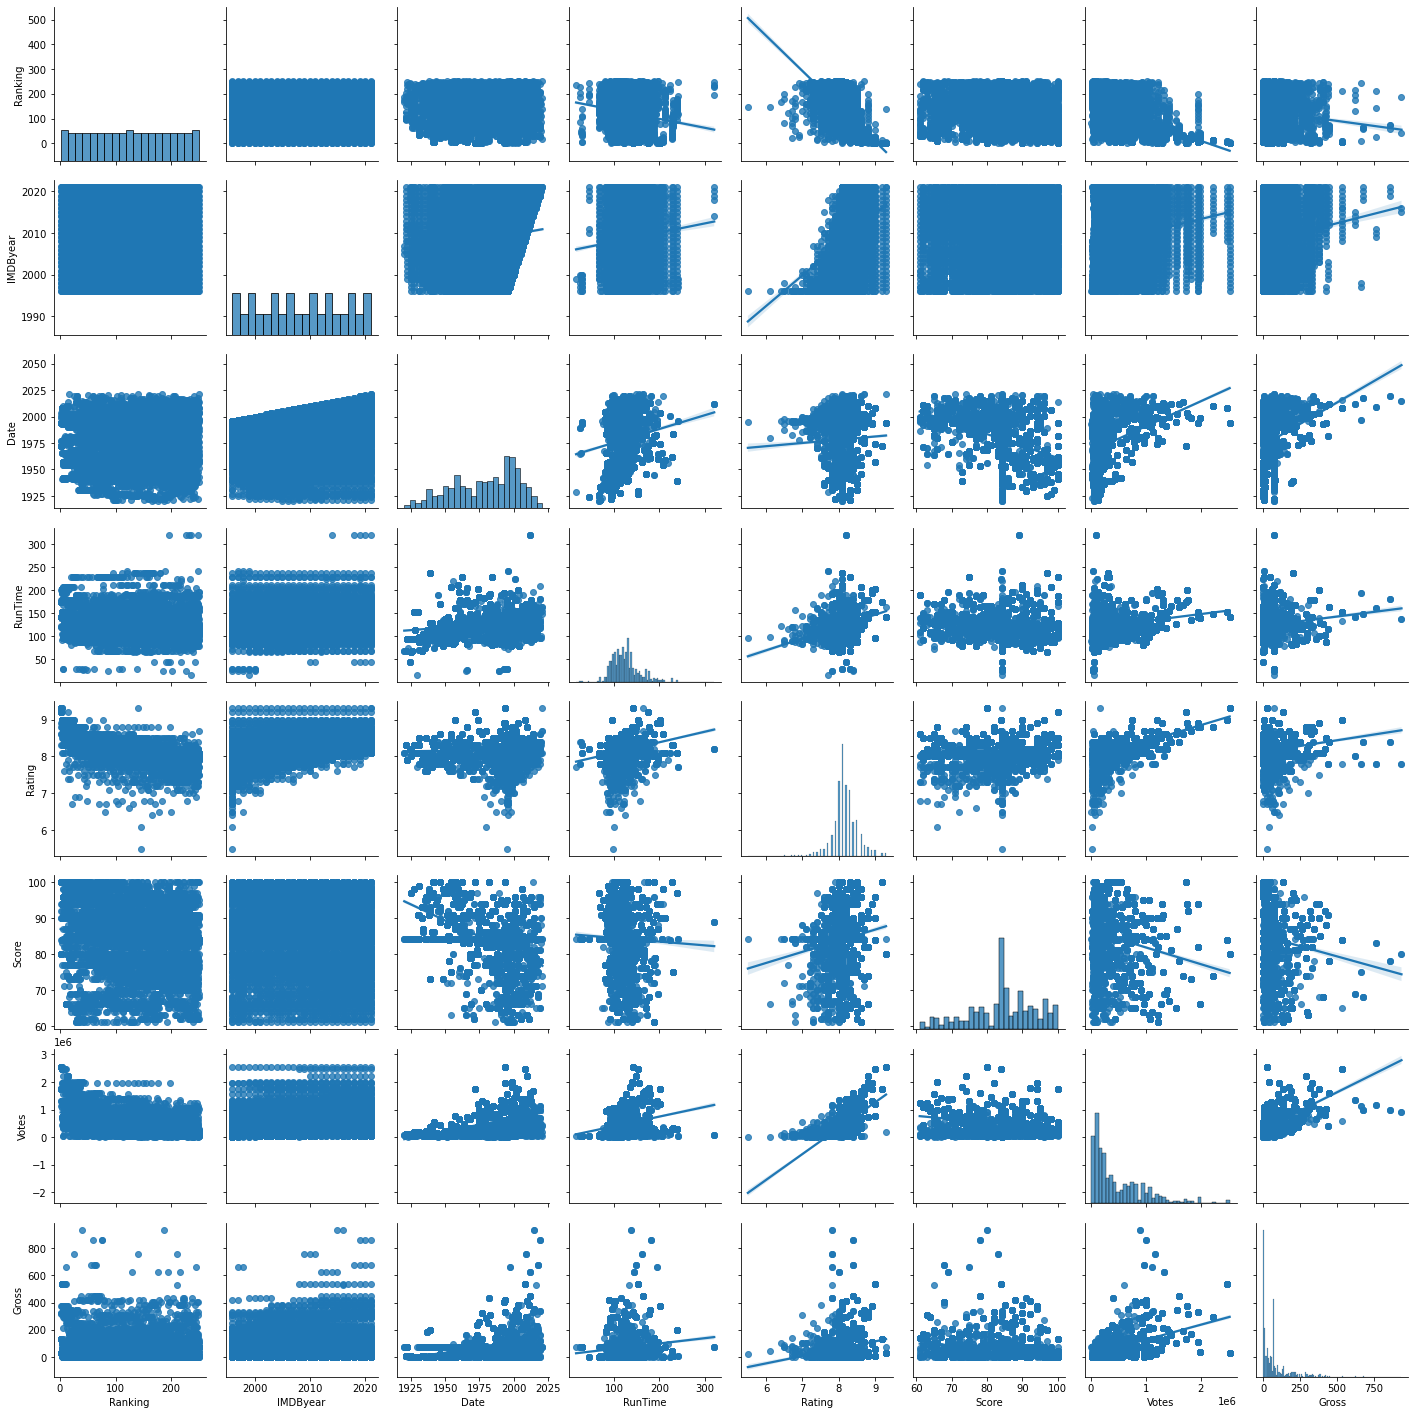

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, kind='reg')
plt.show()

### Burada sadece sayısal verilerden oluşan veri setimiz üzerinden 'pairplot' grafiklendirme yapısını oluşturduk.. Grafiklere baktığımızda 'Score' değerleri ile 'Gross' değerleri arasında ilişki olduğunu gözlemledim. Buradaki parametre grafiklerdeki yanlılık oranını gözlemlememiz ile alakalı... Şimdi bunlar üzerine modeller kuralım.

sns.jointplot(x='Score', y='Gross', data=df, kind='reg');

In [29]:
import statsmodels.api as sm
X = df[["Score"]]
X = sm.add_constant(X)
y = df['Gross']
#Şimdi Modeli kuralım
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Gross   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     90.28
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           2.84e-21
Time:                        07:24:34   Log-Likelihood:                -38876.
No. Observations:                6500   AIC:                         7.776e+04
Df Residuals:                    6498   BIC:                         7.777e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.9786     10.724     16.037      0.000     150.956     193.001
Score         -1.2020      0.127     -9.502      0.000      -1.450      -0.954
==============================================================================
Omnibus:                     3705.200   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33845.180
Skew:                           2.624   Prob(JB):                         0.00
Kurtosis:                      12.871   Cond. No.                         765.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Burada OLS Regresyon çıktısı sonucu 'score' ve 'gross' değişkenlerine ait bir takım özellikler mevcut. Dikkat edeceğimz yer 'R-squared' değeri ve aşağısındakiler. R-squared, bağımsız değişkenin, bağımlı değişkendeki, değişkenliğini açıklama başarısıdır. Bizim bağımsız değişkenimiz olan 'score' değişkeni bağımlı değişkenimiz olan 'gross'un yaklaşık olarak %14'ünü açıklayabiliyormuş. 'Adj. R-squared' değeri ise 'R-squared' değerinin törpülenmiş, düzenlenmiş halidir. Daha çok değişkenli modellerde 'R-squared' değeri artmaya başlar. Bu da açıklanabilirlik durumunu azaltır. Dolayısıyla bu durum için 'Adj. R-squared' değeri daha doğru sonuçlar verecektir bizim için. 'F-statistic' ise modelin anlamlılığının anlaşılması için F istatistiğinin p-value değeridir.

In [30]:
model.params

const    171.978573
Score     -1.202044
dtype: float64

In [31]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,171.9786,10.724,16.037,0.000,150.956,193.001
Score,-1.2020,0.127,-9.502,0.000,-1.450,-0.954


In [33]:
model.summary().tables[2] #Bu şekilde parça parça da bu değerlere ulaşabiliyoruz.

Omnibus:,3705.200,Durbin-Watson:,1.894
Prob(Omnibus):,0.000,Jarque-Bera (JB):,33845.180
Skew:,2.624,Prob(JB):,0.00
Kurtosis:,12.871,Cond. No.,765.


In [35]:
model.fittedvalues[0:5] #Nodelin tahmin ettiği değerler...

0    63.794578
1    75.815022
2    72.208889
3    79.421155
4    70.709617
dtype: float64

In [37]:
y[0:5] #Bunlarda gerçek değerler. Aradaki farkı gözlemleyebiliriz.

0    322.740000
1     28.340000
2     16.500000
3     23.340000
4     70.709617
Name: Gross, dtype: float64

In [39]:
print("Gross= " + str("%.2f" % model.params[0]) + " +Score" + "*" + str("%.2f" % model.params[1])) #Modelin matematiksel formülü

Gross= 171.98 +Score*-1.20


C:\Users\husey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


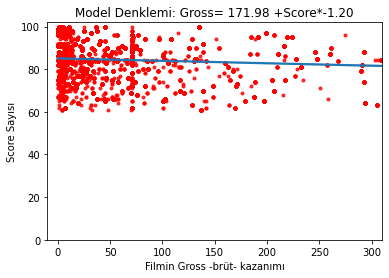

In [50]:
reg = sns.regplot(df["Gross"], df["Score"], x_ci = None, scatter_kws = {'color': 'r', 's': 9})
reg.set_title("Model Denklemi: Gross= 171.98 +Score*-1.20")
reg.set_ylabel("Score Sayısı")
reg.set_xlabel("Filmin Gross -brüt- kazanımı")
plt.xlim(-10, 310)
plt.ylim(bottom = 0)
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

lm = smf.ols("Gross ~ Score", df)
model = lm.fit()
mse = mean_squared_error(y, model.fittedvalues)
mse

9173.166079148572

### Evet bu çıktı "hata kareler ortalamamızı" gösteriyor. Bu, gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin toplamının oranlanması ve bölünmesidir. Yani birim başına bizim yapacağımız ortalama hata. Bunun karekökünü aldığımız da 'RMSE' değerine ulaşıyoruz..

In [85]:
rmse = np.sqrt(mse)
rmse

95.77664683600366

### Şimdi de gerçek değerler ile tahmin edilen değerler arasında bir karşılaştırma tablosu oluşturalım.

In [86]:
from sklearn.linear_model import LinearRegression
X = df[["Score"]]
y = df["Gross"]
reg = LinearRegression()
model = reg.fit(X, y)

k_t = pd.DataFrame({"gercek_y": y[0:10],
                    "tahmin_y": reg.predict(X)[0:10]})
k_t["Hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,Hata
0,322.740000,63.794578,2.589454e+02
1,28.340000,75.815022,-4.747502e+01
2,16.500000,72.208889,-5.570889e+01
3,23.340000,79.421155,-5.608116e+01
4,70.709617,70.709617,-2.415845e-13
5,70.709617,70.709617,-2.415845e-13
6,92.000000,86.633421,5.366579e+00
7,1.020000,51.774134,-5.075413e+01
8,32.870000,71.006844,-3.813684e+01
9,96.900000,58.986401,3.791360e+01


### Sonuç olarak farkları gözlemledik. Fakat burada eksili değerler mevcut. Toplam işlemi yaptığımızda artılı değerler ile eksili değerler birbirini götürecektir. Bunun önüne iki şekilde geçiliyor, ya mutlak değer almamız gerekiyor yada sonuçların karesini...

In [87]:
k_t["Hata_kare"] = k_t["Hata"] ** 2
k_t

,gercek_y,tahmin_y,Hata,Hata_kare
0,322.740000,63.794578,2.589454e+02,6.705273e+04
1,28.340000,75.815022,-4.747502e+01,2.253878e+03
2,16.500000,72.208889,-5.570889e+01,3.103480e+03
3,23.340000,79.421155,-5.608116e+01,3.145096e+03
4,70.709617,70.709617,-2.415845e-13,5.836309e-26
5,70.709617,70.709617,-2.415845e-13,5.836309e-26
6,92.000000,86.633421,5.366579e+00,2.880017e+01
7,1.020000,51.774134,-5.075413e+01,2.575982e+03
8,32.870000,71.006844,-3.813684e+01,1.454419e+03
9,96.900000,58.986401,3.791360e+01,1.437441e+03


In [88]:
np.sum(k_t["Hata_kare"]) #Toplam hata

81051.8277145549

In [89]:
np.mean(k_t["Hata_kare"]) #Hata ortalaması

8105.182771455489

In [90]:
np.sqrt(np.mean(k_t["Hata_kare"])) # Hata kareler ortalamasının karekökü

90.02878857040946

### Çoklu Doğrusal Regresyon - Uygulama

In [96]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop("Gross", axis=1)
y = df["Gross"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=46)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [97]:
model.intercept_ # Modelimizin sabiti

-601.6264663211596

In [98]:
model.coef_ # Modelimizin katsayıları

array([ 1.95750822e-01,  5.62517208e-01, -2.37330484e-03,  1.23298773e-01,
       -8.49408592e+01,  1.43610149e+00,  1.65455182e-04])

### Çoklu doğrusal regresyon için scikit-learn kütüphanesini kullanarak modelimizi kurduk. İlk olarak bağımlı değişkenimiz olan 'Gross'u bağımsız değişkenlerden drop yöntemiyle ayırdık. Bununla birlikte 'test-train' makine öğrenmesi yöntemlerimi oluşturduk. Şimdi eğitim ve test hatalarımıza bakalım.

In [103]:
#Eğitim hatamız:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

76.81396424285983

In [104]:
#Test hatamız:
rmse2 = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse2

77.30699254588666

### Son olarak çoklu doğrusal regresyon için 'model tunning' (model doğrulama) işlemini uygulayarak modelimizin başarısını test edelim.

In [106]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
score = model.score(X_train, y_train)
cross = cross_val_score(model, X,y,cv=10, scoring="r2").mean()
cross

0.3294018153379145

In [109]:
model.score(X_train, y_train)

0.3683211473085394

In [115]:
np.sqrt(-cross_val_score(model, X_train,y_train,cv=10, scoring="neg_mean_squared_error")).mean()

76.89963913989503

In [116]:
np.sqrt(-cross_val_score(model, X_test,y_test,cv=10, scoring="neg_mean_squared_error")).mean()

76.40598976677441

In [143]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

76.81396424285983

### Böylelikle modelimizi oluşturduk, sabitimizi ve katsayılarımızı gözlemledik. Test ve train hatalarımıza ulaştık ve modeli valide ettik.. Ardından tahmini değerleri modelimize entegre edip model doğrulama işlemiyle modelimizin başarısını ölçtük. Bunlar sadece 'Çoklu Doğrusal Regresyon' modeli için geçerli olan şeylerdi. Şimdi temel mantıkta diğer modellere de göz atalım.

### Ridge Regresyon - Uygulama

In [117]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop("Gross", axis=1)
y = df["Gross"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=46) # buraya kadar çoklu regresyonda
# yaptıklarımız aynı...
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train) #modeli kurduk. Buradaki 'alpha' değeri aslında lambdamız
ridge_model.coef_#Katsayılarımızı kontrol ediyoruz.

array([ 1.95828954e-01,  5.61988394e-01, -2.22415421e-03,  1.23237038e-01,
       -8.48918139e+01,  1.43594555e+00,  1.65437779e-04])

In [118]:
ridge_model.intercept_#sabitimiz, şimdi rastgele sayıda lambda üreterek model katsayılarımızın uğradığı değişikliği gözlemleyelim

-601.2407013327894

In [119]:
lambdas = 10 ** np.linspace(10,-2,100) * 0.5
lambdas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [124]:
ridge_model = Ridge()
katsayilar = []
for i in lambdas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
katsayilar

[array([ 1.19809698e-03,  4.27568650e-06,  1.67439824e-04, -6.46477709e-07,
        -5.26061793e-06,  1.67742884e-05,  1.09999336e-04]),
 array([ 1.58172847e-03,  5.62072672e-06,  2.21086975e-04, -8.05168895e-07,
        -6.95007222e-06,  2.22804093e-05,  1.10027289e-04]),
 array([ 2.08731711e-03,  7.37551623e-06,  2.91814016e-04, -9.77916991e-07,
        -9.18033596e-06,  2.96375572e-05,  1.10064065e-04]),
 array([ 2.75298208e-03,  9.65478958e-06,  3.84978416e-04, -1.14199398e-06,
        -1.21232331e-05,  3.94994969e-05,  1.10112436e-04]),
 array([ 3.62827828e-03,  1.25976572e-05,  5.07559131e-04, -1.24753563e-06,
        -1.60042344e-05,  5.27727410e-05,  1.10176003e-04]),
 array([ 4.77727680e-03,  1.63664225e-05,  6.68604345e-04, -1.19469764e-06,
        -2.11185276e-05,  7.07282842e-05,  1.10259415e-04]),
 array([ 6.28221777e-03,  2.11387216e-05,  8.79771524e-04, -7.93804190e-07,
        -2.78514250e-05,  9.51704473e-05,  1.10368642e-04]),
 array([ 8.24764417e-03,  2.70866922e-05,

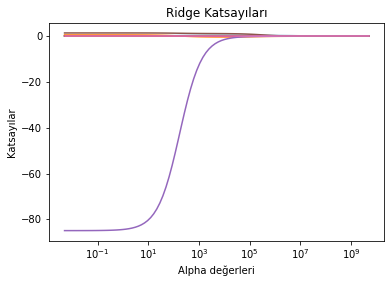

In [125]:
px = plt.gca()
px.plot(lambdas, katsayilar)
px.set_xscale('log')
plt.xlabel('Alpha değerleri')
plt.ylabel('Katsayılar')
plt.title('Ridge Katsayıları')
plt.show()

### Ridge Regresyon - Tahmin:

In [126]:
y_pred = ridge_model.predict(X_test) #Artık klasik olarak tahmin modeli oluşturmak için 'predict' kullanıldığını biliyoruz.
np.sqrt(mean_squared_error(y_test, y_pred))

77.30699842379397

### Ridge Regresyon - Model Tunning

In [131]:
from sklearn.linear_model import RidgeCV
from warnings import filterwarnings
filterwarnings('ignore')
lambdas = 10 ** np.linspace(10, -2, 100) * 0.5
ridge_cv = RidgeCV(alphas = lambdas, scoring = "neg_mean_squared_error", normalize = True)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

0.005

#### Evet bunlarla birlikte optimum lambda değerimizi ürettik. Şimdi bunu kullanarak final değerimize ulaşmaya çalışacağız. Tune işlemleri...

In [134]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, normalize = True).fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

77.29178372282998

 ### Lasso Regresyon - Uygulama

In [135]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha= 0.1).fit(X_train, y_train)
lasso_model.coef_

array([ 2.00550810e-01,  5.28110966e-01,  6.45881075e-03,  1.19415937e-01,
       -8.19055974e+01,  1.42485606e+00,  1.64384105e-04])

In [137]:
lasso = Lasso()
lambdas = 10 ** np.linspace(10, -2, 100) * 0.5
katsayilar = []

for i in lambdas:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
katsayilar

[array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.,  0.,  0.,  0.,  0., -0.,  0.]),
 array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  9.41039931e-07]),
 array([

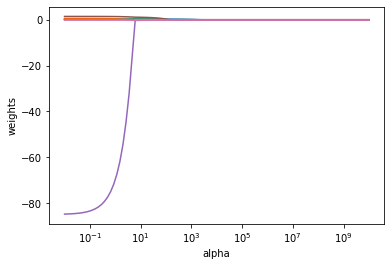

In [139]:
px = plt.gca()
px.plot(lambdas * 2, katsayilar)
px.set_xscale('log')
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.show()

### Lasso'nun Ridge'den farkı değerlerin gerçekten sıfır olduğu ile alakası. Oluşturduğumuz grafik vasıtasıyla söylenbilir ki belli bir kısmının değer aldığını fakat diğer kısımların sıfır olduğunu gözlemliyoruz.

### Lasso Regresyon Tahmin Yapısı:

In [140]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

77.3162135157733

### Lasso Regresyon: Model Tunning Yapısı

In [141]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
las = lasso_cv_model.fit(X_train, y_train)
las.alpha_

0.00222437521216984

### Bu modellerin içindeki değişkenlerin hepsi 'hiperparametre' olarak adlandırılıyor. Kullanıcının değişikliği ile şekillenebilecek yapılar. Yani oynamalar yapıp daha farklı sonuçlara ulaşabiliriz..

In [142]:
lasso_tuned = Lasso(alpha = las.alpha_).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

77.30714251973986

### Sonuç olarak üç farklı model denedik. Bunlar 'Çoklu Doğrusal Regresyon', 'Lasso Regresyon' ve 'Ridge Regresyon'. Her birinde benzer işler yapsakta farklı sonuçlar elde ettik. Şöyle her birinin model tune değerine baktığımızda; çoklu doğrusal: 76.813, lasso: 77.307 ve ridge: 77.291 gibi birbirine çok yakın fakat farklı sonuçlar üretmiş. Burada daha fazla model daha kullanabiliriz, en iyi sonucu elde etmek için. Fakat şimdilik bu üç regresyon modeli ile sonlandırayım. Yeri gelince güncellemeye devam ederim burayı.